**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [5]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context("talk")

# from decouple import config
from sqlalchemy import create_engine, text
from google.colab import files
import io

import plotly

plotly.__version__
# Make sure it's 4.14.3

melb_df = pandas.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv"
)
melb_df[:3]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



# Solución

### Creación de la base de datos

In [6]:
engine = create_engine("sqlite:///melb_housing_data.sqlite3", echo=True)

### Se ingresan los datos de melbourn a la base de datos

In [7]:
melb_df.to_sql("mlb_data", con=engine, if_exists="replace")

# Se sube el csv de los datos de aribnb
uploaded = files.upload()

file_key = "airbnb_price_by_zipcode.csv"  # Replace for correspoing key
airbnb_df = pandas.read_csv(io.StringIO(uploaded[file_key].decode("utf-8")))

airbnb_df[:3]

2022-05-07 12:38:31,996 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("mlb_data")
2022-05-07 12:38:31,999 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:32,003 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("mlb_data")
2022-05-07 12:38:32,006 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:32,010 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-07 12:38:32,012 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:32,016 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("mlb_data")
2022-05-07 12:38:32,017 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:32,024 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-07 12:38:32,028 INFO sqlalchemy.engine.Engine [raw sql] ('mlb_data',)
2022-05-07 12:38:32,030 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("mlb_d

Saving airbnb_price_by_zipcode.csv to airbnb_price_by_zipcode.csv


,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.0,1,NaN,NaN
1,2134.0,50.0,1,NaN,NaN
2,2582.0,104.0,1,NaN,NaN


### Se ingresan los datos de arbnb a la base de datos

In [8]:
airbnb_df.to_sql("airbnb_data", con=engine, if_exists="replace")

2022-05-07 12:38:41,354 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-05-07 12:38:41,361 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:41,363 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_data")
2022-05-07 12:38:41,367 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-07 12:38:41,379 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-07 12:38:41,383 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_data (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-05-07 12:38:41,390 INFO sqlalchemy.engine.Engine [no key 0.00702s] ()
2022-05-07 12:38:41,406 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_data_index ON airbnb_data ("index")
2022-05-07 12:38:41,409 INFO sqlalchemy.engine.Engine [no key 0.00237s] ()
2022-05-07 12:38:41,423 INFO sqlalchemy.engine.Engine COMMIT
2022-05-07 12:38:41,427 INFO sqlalchemy.en

### Cantidad de registros totales por ciudad

In [9]:
query = "SELECT Postcode, COUNT(*) FROM mlb_data GROUP BY Postcode"

df = pandas.read_sql_query(sql=query, con=engine)

df

2022-05-07 12:38:41,502 INFO sqlalchemy.engine.Engine SELECT Postcode, COUNT(*) FROM mlb_data GROUP BY Postcode
2022-05-07 12:38:41,506 INFO sqlalchemy.engine.Engine [raw sql] ()


,Postcode,COUNT(*)
0,3000.0,46
1,3002.0,22
2,3003.0,31
3,3006.0,41
4,3008.0,3
...,...,...
193,3809.0,1
194,3810.0,3
195,3910.0,6
196,3976.0,4


### Cantidad de registros totales por barrio y ciudad

In [10]:
query = "SELECT Postcode, Suburb ,count(1) as Count FROM mlb_data GROUP BY Postcode, Suburb"

df = pandas.read_sql_query(sql=query, con=engine)

df

2022-05-07 12:38:41,584 INFO sqlalchemy.engine.Engine SELECT Postcode, Suburb ,count(1) as Count FROM mlb_data GROUP BY Postcode, Suburb
2022-05-07 12:38:41,586 INFO sqlalchemy.engine.Engine [raw sql] ()


,Postcode,Suburb,Count
0,3000.0,Melbourne,46
1,3002.0,East Melbourne,22
2,3003.0,West Melbourne,31
3,3006.0,Southbank,41
4,3008.0,Docklands,3
...,...,...,...
309,3976.0,Hampton Park,4
310,3977.0,Cranbourne,3
311,3977.0,Cranbourne North,2
312,3977.0,Sandhurst,1


### Combinar los datasets de ambas tablas ingestadas utilizando el comando `JOIN` de SQL para obtener un resultado similar a lo realizado con Pandas en clase

In [11]:
query = "SELECT * FROM mlb_data LEFT JOIN airbnb_data ON mlb_data.Postcode=airbnb_data.zipcode LIMIT 10"

df = pandas.read_sql_query(sql=query, con=engine)

df[:20]


2022-05-07 12:38:41,674 INFO sqlalchemy.engine.Engine SELECT * FROM mlb_data LEFT JOIN airbnb_data ON mlb_data.Postcode=airbnb_data.zipcode LIMIT 10
2022-05-07 12:38:41,677 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,index,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.7996,144.9984,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8079,144.9934,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8093,144.9944,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,-37.7969,144.9969,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,-37.8072,144.9941,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
5,5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,...,-37.8041,144.9953,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
6,6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,-37.8024,144.9993,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
7,7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,-37.8060,144.9954,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
8,8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,...,-37.8008,144.9973,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258
9,9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,...,-37.8010,144.9989,Northern Metropolitan,4019.0,57,3067.0,130.624031,258,605.152174,2187.032258


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Solución

### Se exploran las columnas del dataset de melborn

In [12]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Se eligen las siguientes columnas del dataset de melborn, para la predicción del precio
ello en razón de que son las que más pueden impactar en el precio de una casa.
Quizas la ubicación, como el barrio, la ciudad, la región, podrían ser otros
datos que impacten en el precio. Pero dado el desconocimiento que tenemos sobre la relevancia de la ubicación geográfica,
 las columnas elegidas serían las siguientes para determinar el precio.

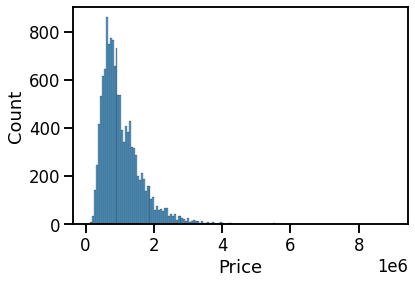

In [13]:
colums_predict_price = [
    "Address",
    "Rooms",
    "Price",
    "Bedroom2",
    "Bathroom",
    "Landsize",
    "Car",
]
melb_df.loc[:, colums_predict_price]

# se ven algunas métricas del dataset melborn
melb_df["Price"].describe().apply(lambda s: "{0:.2f}".format(s))

seaborn.histplot(melb_df.Price.dropna())

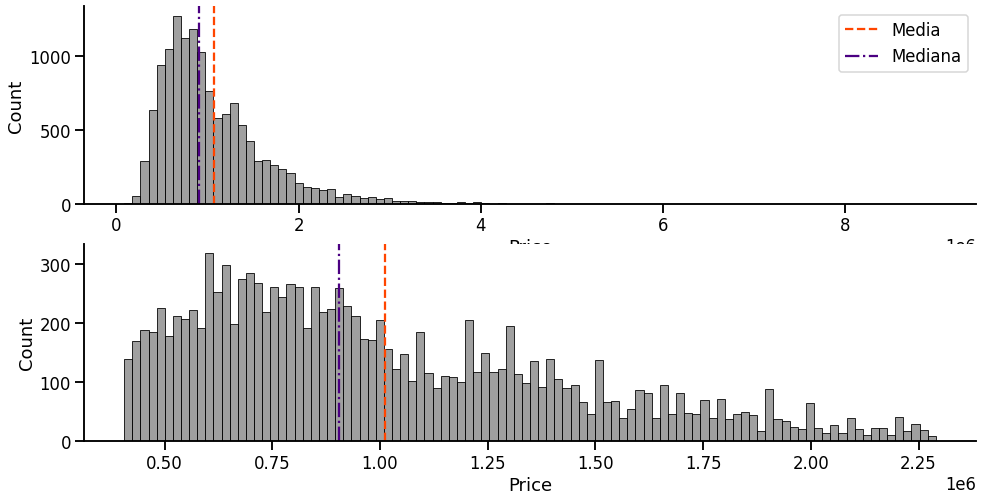

In [14]:
min_price = melb_df.Price.quantile(0.05)
max_price = melb_df.Price.quantile(0.95)

melb_df_filtered = melb_df[
    (melb_df["Price"] > min_price) & (melb_df["Price"] < max_price)
]

fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(melb_df["Price"], bins=100, ax=axes[0], color="gray")
axes[0].axvline(
    melb_df["Price"].mean(), color="orangered", linestyle="--", label="Media"
)
axes[0].axvline(
    melb_df["Price"].median(), color="indigo", linestyle="-.", label="Mediana"
)

# filtered_df = melb_df[(melb_df['Price']< 85000)]# & (melb_df['Price']> 85000)]
seaborn.histplot(melb_df_filtered["Price"], bins=100, ax=axes[1], color="gray")
axes[1].axvline(
    melb_df_filtered["Price"].mean(), color="orangered", linestyle="--", label="Media"
)
axes[1].axvline(
    melb_df_filtered["Price"].median(), color="indigo", linestyle="-.", label="Mediana"
)

axes[0].legend()
seaborn.despine()


In [15]:

airbnb_df_all = pandas.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv"
)

airbnb_df_all.columns

airbnb_df_all["zipcode"] = pandas.to_numeric(airbnb_df_all.zipcode, errors="coerce")

airbnb_df_all["airbnb_zipcode_counter"] = airbnb_df_all.zipcode.value_counts()

airbnb_df_all.loc[:3, ["accommodates", "bathrooms", "bedrooms", "beds"]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accommodates,bathrooms,bedrooms,beds
0,2,1.0,1.0,2.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,2.0
3,1,1.5,1.0,1.0


### 2.1) Se determinan las variables a agregar y las combinaciones

In [16]:
relevant_cols = [
    "price",
    "weekly_price",
    "monthly_price",
    "security_deposit",
    "review_scores_rating",
    "review_scores_location",
    "zipcode",
]

airbnb_price_by_zipcode = (
    airbnb_df_all[relevant_cols]
    .groupby("zipcode")
    .agg(
        airbnb_price_mean=("price", "mean"),
        airbnb_price_median=("price", "median"),
        airbnb_price_min=("price", "min"),
        airbnb_price_max=("price", "max"),
        airbnb_weekly_price_mean=("weekly_price", "mean"),
        airbnb_monthly_price_mean=("monthly_price", "mean"),
        airbnb_security_deposit_mean=("security_deposit", "mean"),
        airbnb_review_scores_rating_mean=("review_scores_rating", "mean"),
        airbnb_review_scores_location_mean=("review_scores_location", "mean"),
    )
    .reset_index()
)

airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_price_min,airbnb_price_max,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_security_deposit_mean,airbnb_review_scores_rating_mean,airbnb_review_scores_location_mean
0,2010.0,40.0,40.0,40,40,NaN,NaN,NaN,NaN,NaN
1,2134.0,50.0,50.0,50,50,NaN,NaN,NaN,NaN,NaN
2,2582.0,104.0,104.0,104,104,NaN,NaN,NaN,NaN,NaN


In [17]:

airbnb_df_all.zipcode.value_counts()

reg_mayor_50 = airbnb_df_all[airbnb_df_all["airbnb_zipcode_counter"] >= 25]
zipcode_reg = reg_mayor_50["zipcode"]
airbnb_price_by_zipcode_filtered = airbnb_price_by_zipcode[
    airbnb_price_by_zipcode["zipcode"].isin(zipcode_reg)
]
len(airbnb_price_by_zipcode_filtered)

52

### 2.2) Se usa la variable zipcode para unir el conjunto de datos

In [18]:
merged_sales_df = melb_df_filtered.merge(
    airbnb_price_by_zipcode_filtered, how="left", left_on="Postcode", right_on="zipcode"
)
merged_sales_df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_price_min,airbnb_price_max,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_security_deposit_mean,airbnb_review_scores_rating_mean,airbnb_review_scores_location_mean
5683,Viewbank,24 Martins La,3,h,820000.0,S,Nelson,6/08/2016,13.8,3084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7144,Maidstone,5 Ballarat Rd,2,h,640000.0,PI,Sweeney,20/05/2017,9.2,3012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10382,Bentleigh,11 Buckingham Av,3,h,1640000.0,S,Woodards,22/07/2017,11.4,3204.0,...,3204.0,114.612500,71.0,19.0,975.0,719.222222,2936.000000,314.268293,94.596154,9.692308
8907,Newport,112 Johnston St,3,h,1230000.0,S,Williams,24/06/2017,6.2,3015.0,...,3015.0,132.046154,96.0,37.0,599.0,706.125000,2002.333333,278.868421,95.291667,9.625000
934,Braybrook,80 South Rd,4,h,610000.0,VB,Biggin,17/09/2016,10.8,3019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.3) En cuanto a otras variables (o campos) de los datasets analizados, que podrían ser consideradas a los fines de poder combinar los datos, podrían ser considereadas las siguientes:

- **El campo city del dataset de airbnb y el campo CouncilArea del dataset de Melbourn:**
La factibilidad de poder utilizar estos campos la pudimos constatar al analizar algunos datos, y verificar que en ambas columnas hay información coincidente en cuanto a nombres de regiones o áreas administrativas, en las que se dividen las ciudades de Australia (algo similar a comunas o partidos). 
En consecuencia, el uso de estas variables permitiría generar otro tipo de combinaciones, que permitan obtener información que ayude a predecir los precios tomando como base el espacio administrativo en donde se radican las casas. 

- **Los campos latitud y longitud presente en ambos datasets:**
Asumiendo que se cuenta con un algoritmo que permite encontrar las distintas ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. Se toman las variables latitud y longitud presente en ambos datasets.

 - *Latitud*: Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur. 

 - *Longitud*: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).

  Para el dataset de Melbourne serían las columnas Lattitude y Longtitude y para el de Airbnb las columnas latitude y longitude.

  Para verificar que las áreas representadas por ambos datasets son consistentes en su ubicación geográfica, por medio de las variables seleccionadas(latitud y logitud), se realiza la siguiente exploración visual.

In [19]:
import plotly.express as px
data = melb_df.sample(300)
fig = px.scatter_geo(
    data, lat=data.Lattitude, lon=data.Longtitude, color=data.YearBuilt
    )
fig.update_geos(fitbounds="locations")
fig.show()

In [20]:
# Para airbnb
import plotly.express as px
color_col = 'city'
data = airbnb_df_all[~airbnb_df_all[color_col].isna()].sample(300)
fig = px.scatter_geo(
    data, lat=data.latitude, lon=data.longitude, color=data[color_col]
    )
fig.update_geos(fitbounds="locations")
fig.show()

Se puede observar que se tratan de zonas similares. Por lo tanto luego de un trabajo de curación sobre las columnas seleccionadas de ambos datasets y con la ayuda del algoritmo de geolocalización y cálculo de distancias se puede llevar a cabo una combinación de información que permita tener mejores herramientas para la estimación de los precios de las propiedades.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

# Solución

In [21]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)

files.download("melb_data_extended.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)